In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Read the data and store it in dataframe
data_file = 'iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
data = pd.read_csv(data_file, names = col_names)
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [4]:
df = data[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]

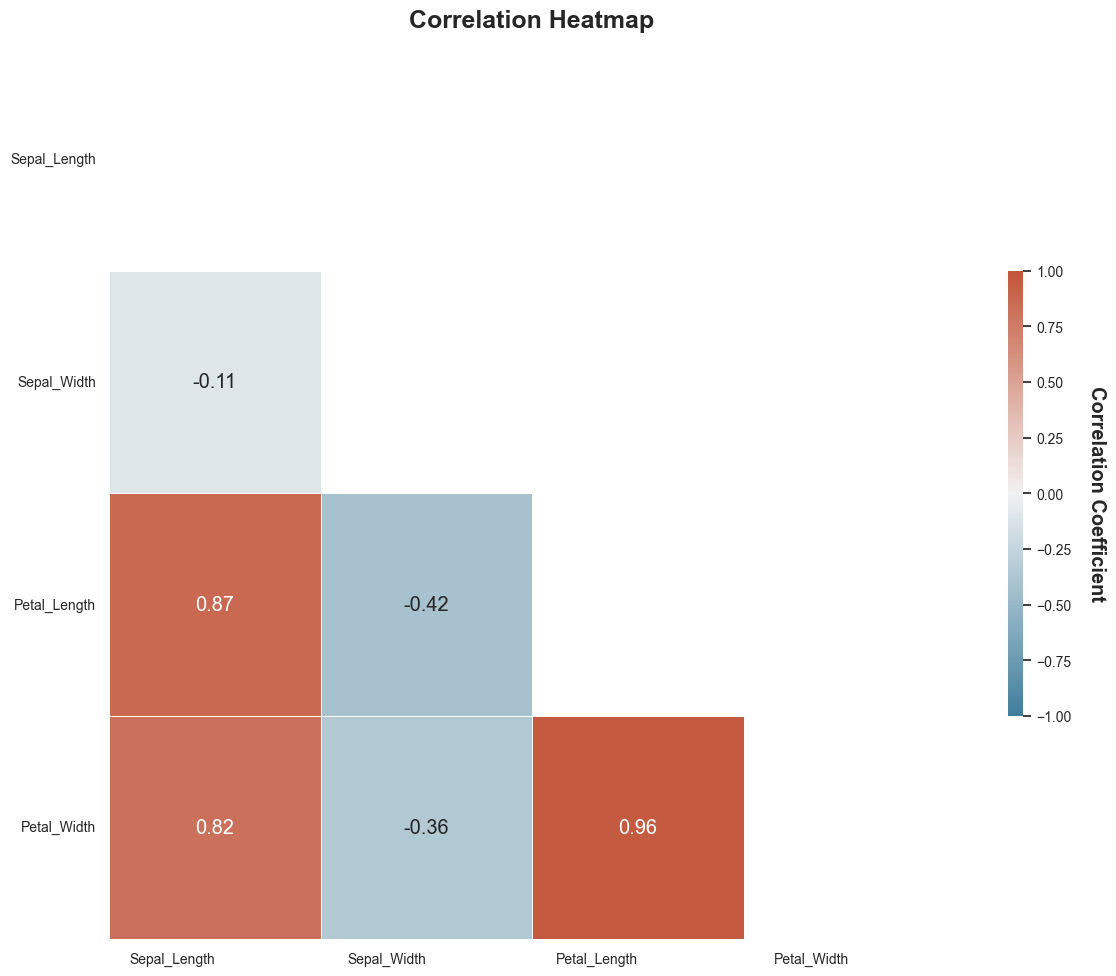

In [5]:
# Calculate correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set the style and context for the plot
sns.set_style("white")
sns.set_context("notebook", font_scale=1.2)

# Create a figure and a set of subplots
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt=".2f",  vmax=1.0, vmin=-1.0, 
            cbar_kws={"shrink": .5, "aspect": 30, "ticks": [-1,-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]},linewidths=.5, ax=ax)

# Customize color bar
cbar = ax.collections[0].colorbar
cbar.set_label('Correlation Coefficient',weight='bold', rotation=270, labelpad=25)
cbar.ax.tick_params(labelsize=10)

# Add titles and labels
ax.set_title('Correlation Heatmap', fontsize=18, weight='bold', pad=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

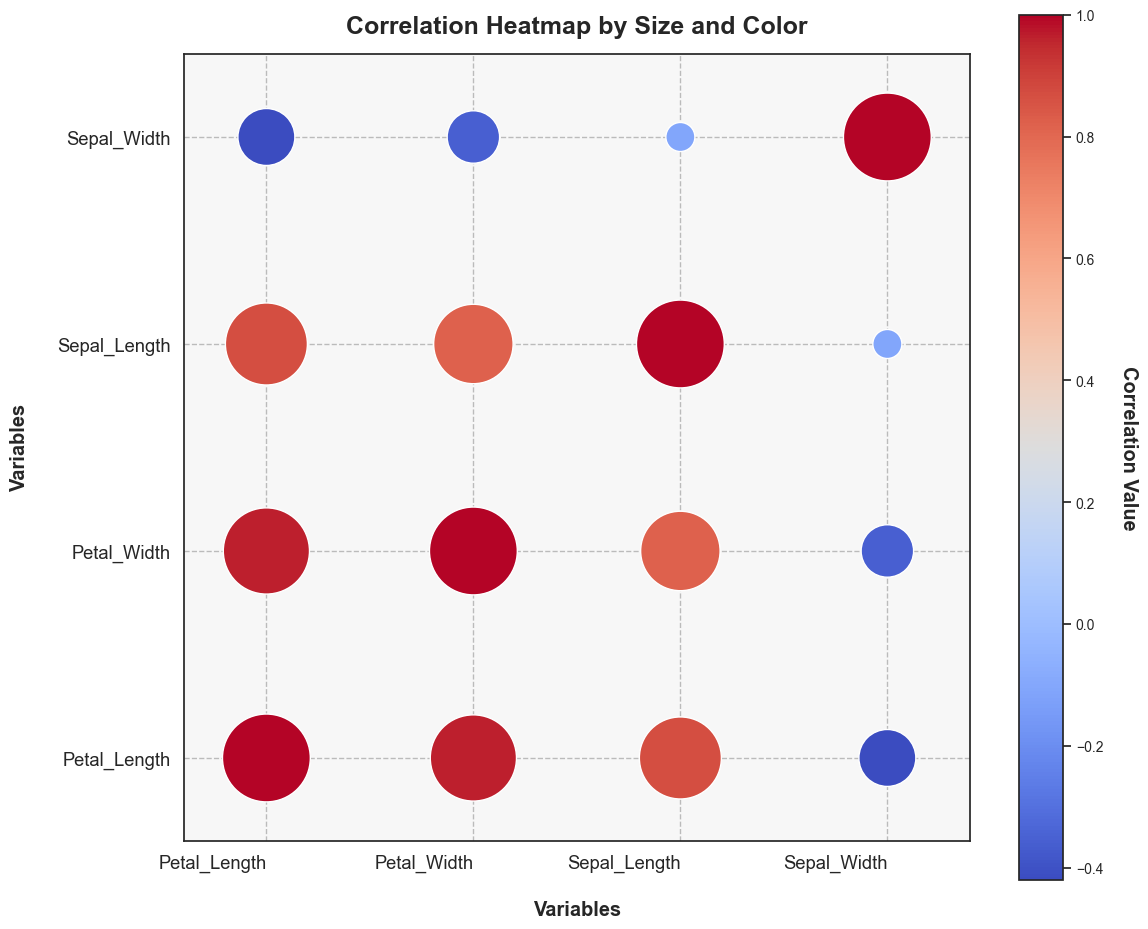

In [6]:
# Calculate the correlation matrix
corr = df.corr()

# Unpivot the dataframe to get pairs of arrays for x and y
corr = pd.melt(corr.reset_index(), id_vars='index')
corr.columns = ['x', 'y', 'value']

# Create a figure and a set of subplots
f, ax = plt.subplots(figsize=(12, 10))

# Mapping from column names to integer coordinates
x_labels = [x for x in sorted(corr['x'].unique())]
y_labels = [y for y in sorted(corr['y'].unique())]
x_to_num = {n[1]: n[0] for n in enumerate(x_labels)}
y_to_num = {n[1]: n[0] for n in enumerate(y_labels)}

# Increase size_scale to make circles larger
size_scale = 4000
scatter = ax.scatter(
    x=corr['x'].map(x_to_num),  
    y=corr['y'].map(y_to_num),  
    s=corr['value'].abs() * size_scale,  # circle sizes proportional to correlation value
    c=corr['value'],  # Color by the correlation value
    cmap='coolwarm',  
    marker='o',  # Use circle as scatterplot marker
    edgecolor='w'  # White edges
)

# Ensure the aspect ratio is equal
ax.set_aspect('equal', adjustable='box')

# Show column labels on the axes
ax.set_xticks([x_to_num[x] for x in x_labels])
ax.set_xticklabels(x_labels, rotation=0, horizontalalignment='right')
ax.set_yticks([y_to_num[y] for y in y_labels])
ax.set_yticklabels(y_labels)

# Add padding around the plot
padding = 0.4
ax.set_xlim(-padding, len(x_labels) - 1 + padding)
ax.set_ylim(-padding, len(y_labels) - 1 + padding)

# Add color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Correlation Value', weight='bold', rotation=270, labelpad=25)
cbar.ax.tick_params(labelsize=10)

# Set plot labels
ax.set_xlabel('Variables',labelpad=20,weight='bold')
ax.set_ylabel('Variables',labelpad=20,weight='bold')
ax.set_title('Correlation Heatmap by Size and Color', fontsize=18, weight='bold', pad=15)

# Customize grid and background
ax.grid(True, linestyle='--', color='gray', alpha=0.5)
ax.set_facecolor('#f7f7f7')

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()